## Get the X/Y coordinates of an object of interest using openCV

Using this tutorial for extracting image coordinates:
http://creativemorphometrics.co.vu/blog/2014/08/05/automated-outlines-with-opencv-in-python/

In [1]:
import numpy as np
import cv2 
from matplotlib import pyplot as plt

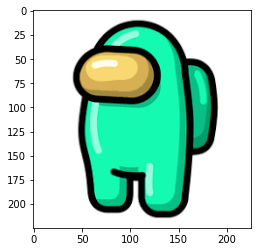

In [2]:
# load image 
image_path = 'images/sus.png'
pic = cv2.imread(image_path)
plt.imshow(pic)

(([], []), ([], []))

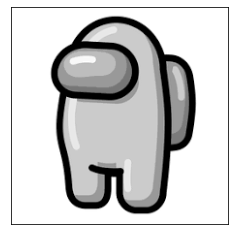

In [3]:
# convert to grayscale
pic_bw = cv2.cvtColor(pic, cv2.COLOR_BGR2GRAY)

# show the image
plt.imshow(pic_bw, 'gray')
plt.xticks([]), plt.yticks([])

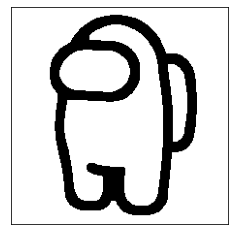

In [4]:
ret,thresh1 = cv2.threshold(pic_bw,15,255,cv2.THRESH_BINARY) #the value of 15 is chosen by trial-and-error to produce the best outline of the skull
kernel = np.ones((5,5),np.uint8) #square image kernel used for erosion
erosion = cv2.erode(thresh1, kernel,iterations = 1) #refines all edges in the binary image

opening = cv2.morphologyEx(erosion, cv2.MORPH_OPEN, kernel)
closing = cv2.morphologyEx(opening, cv2.MORPH_CLOSE, kernel) #this is for further removing small noises and holes in the image

plt.imshow(closing, 'gray') #Figure 2
plt.xticks([]), plt.yticks([])
plt.show()



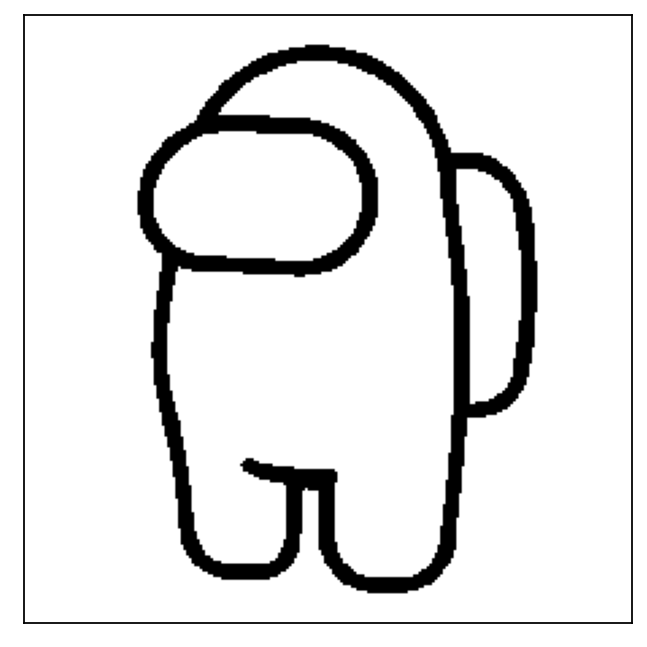

In [349]:
# try a bigger erosion kernel
sc.set_figure_params(dpi=80, figsize=(5,5))

ret,thresh1 = cv2.threshold(pic_bw,15,255,cv2.THRESH_BINARY) #the value of 15 is chosen by trial-and-error to produce the best outline of the skull
kernel = np.ones((1,1),np.uint8) #square image kernel used for erosion
erosion = cv2.erode(thresh1, kernel,iterations = 1) #refines all edges in the binary image

opening = cv2.morphologyEx(erosion, cv2.MORPH_OPEN, kernel)
closing = cv2.morphologyEx(opening, cv2.MORPH_CLOSE, kernel) #this is for further removing small noises and holes in the image

plt.imshow(closing, 'gray') #Figure 2
plt.xticks([]), plt.yticks([])
plt.show()



(34.65, 196.35, -222.05, -0.9499999999999993)

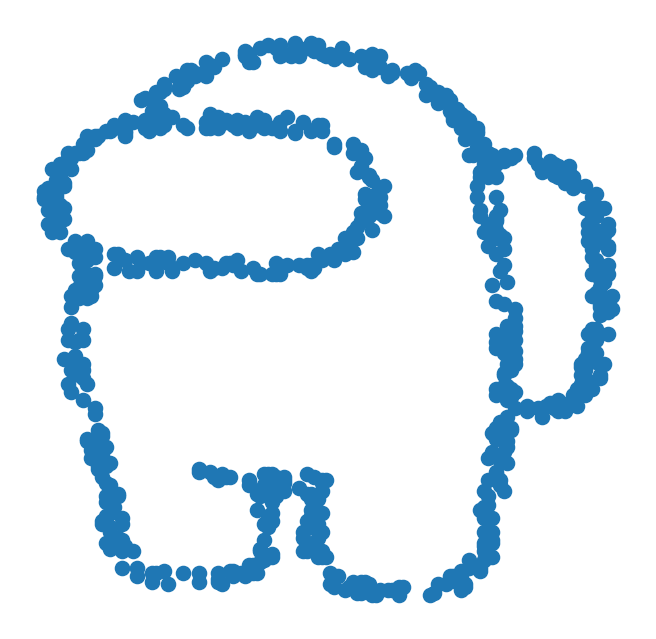

In [421]:
# if running this block skip to the next header in the notebook
coords = []
for i in range(closing.shape[0]):
    for j in range(closing.shape[1]):
        if closing[i,j] == 0:
            coords.append(np.array([j,i]))
coords = np.array(coords).transpose()
#coords.shape


# randomly sample 1000 of these points
coords = coords[:,np.random.choice(coords.shape[1], size=750, replace=False)]


plt.scatter(coords[0], -coords[1])
plt.axis('off')

## Amogus too thicc, make him thinn

We tried to de-dummy the thiccness, but alas it did not work.

https://answers.opencv.org/question/163561/looking-for-a-thinningskeletonizing-algorithm-with-opencv-in-python/

(-0.5, 224.5, 224.5, -0.5)

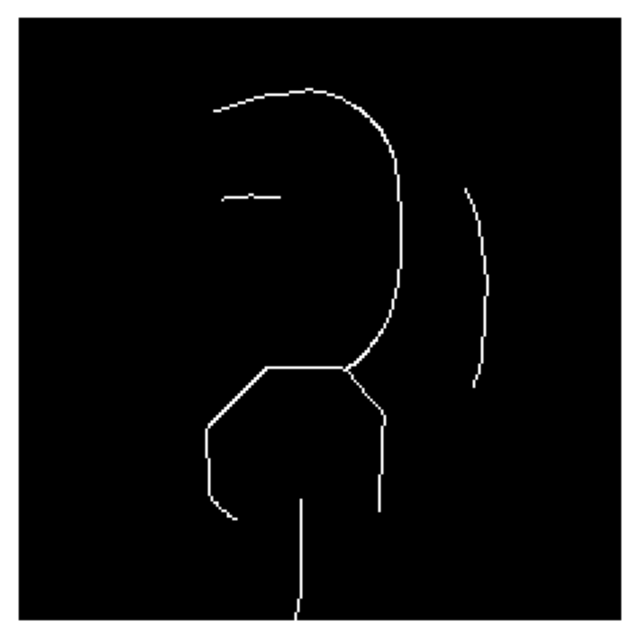

In [118]:
# test = cv2.ximgproc.thinning(closing)
# plt.imshow(test, 'gray')
# plt.axis('off')


In [368]:

# compute contours
image, contours, hierarchy = cv2.findContours(closing,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE) #find contours with simple approximation



In [369]:
areas = [] #list to hold all areas

for contour in contours:
  ar = cv2.contourArea(contour)
  areas.append(ar)

max_area = max(areas)
max_area_index = areas.index(max_area) #index of the list element with largest area

cnt = contours[max_area_index] #largest area contour



In [370]:
cnt = np.expand_dims(cnt,axis=2).repeat(3,axis=2)

In [371]:

# concatenate the contours, ignore the v smol bois:
combined = np.concatenate([c for c in contours if c.shape[0] >= 10]) 
coords = combined.reshape(combined.shape[0], 2)

(-78.31526336806645, 91.65856708161091, -90.19882764466496, 68.51908373221397)

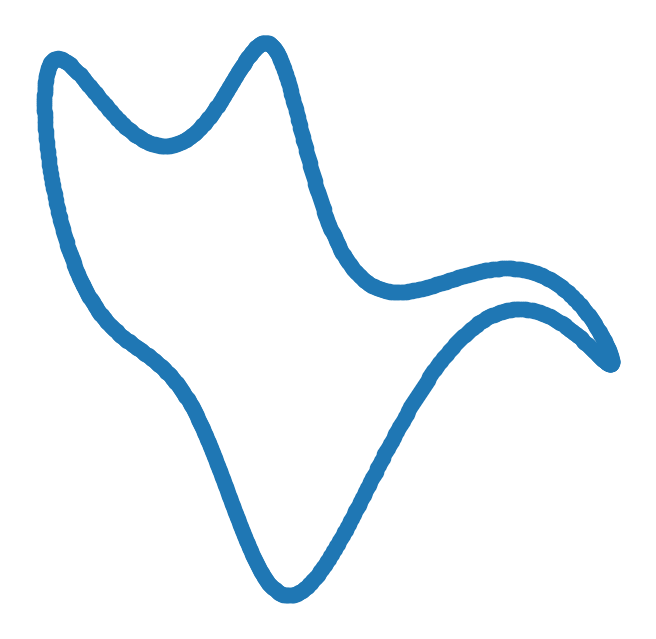

In [400]:
plt.scatter(coords[:,0], -coords[:,1])
plt.axis('off')

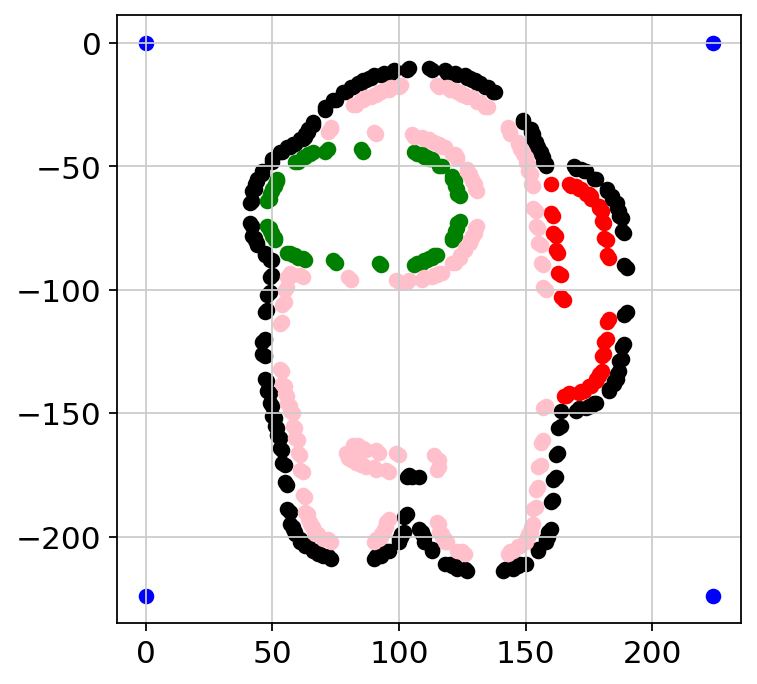

In [374]:
colors = ['b', 'k', 'r', 'g', 'pink']
for color, contour in zip(colors, contours):
        
    c = contour.reshape(contour.shape[0], 2)
    plt.scatter(c[:,0],-c[:,1],color=color)

(229, 1, 2)
(189, 1, 2)
(36, 1, 2)
(54, 1, 2)


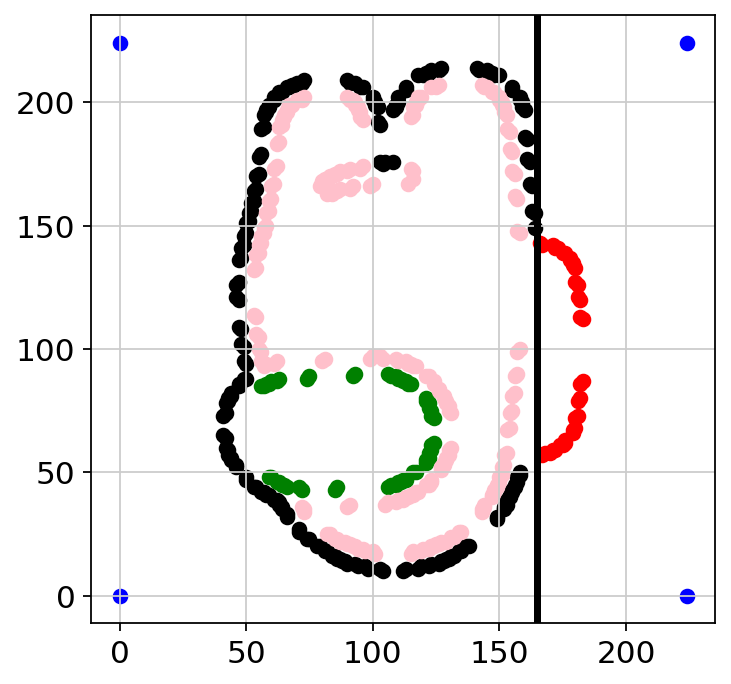

In [375]:
sc.set_figure_params(dpi=80, figsize=(5,5))


colors = ['b', 'k', 'r', 'g', 'pink']
subset_cnt = []
for color, contour in zip(colors, contours):
    
    
    # fix the black contour:
    if color == 'k':
        #contour = np.array([c for c in contour if c[0][0] < 50])
        print(contour.shape)
        new_contour = []
        for c in contour:
            x_max = 165
            plt.axvline(x_max, linewidth=3, color='k')
            if c[0][0] < x_max:
                new_contour.append(c)
        contour = np.array(new_contour)
        print(contour.shape)
        #contour = np.array([c for c in contour if c[0][0] < 50 and c[0][0] > 125 and c[0][1] < 30 and c[0][1] > 100])
    
    # fix the green contour:
    if color == 'g':
        new_contour = []
        for c in contour:
            x_min = 55
 
            if c[0][0] > x_min:
                new_contour.append(c)
        contour = np.array(new_contour)
        print(contour.shape)
    
    
    # fix the red contour:
    if color == 'r':
        new_contour = []
        for c in contour:
            x_min = 165
 
            if c[0][0] > x_min:
                new_contour.append(c)
        contour = np.array(new_contour)
        print(contour.shape)
    
    if color in ['k', 'g', 'r']:
        subset_cnt.append(contour)
        
    c = contour.reshape(contour.shape[0], 2)
    plt.scatter(c[:,0],c[:,1],color=color)

In [376]:
# just use the pink, green, and red contours
#subset_cnt = [cnt for color, cnt in zip(colors, contours) if color in ['pink', 'g', 'r']]

# concatenate the contours, ignore the v smol bois:
combined = np.concatenate([c for c in subset_cnt])
coords = combined.reshape(combined.shape[0], 2)
coords.shape

(279, 2)

(0.0, 255.0)

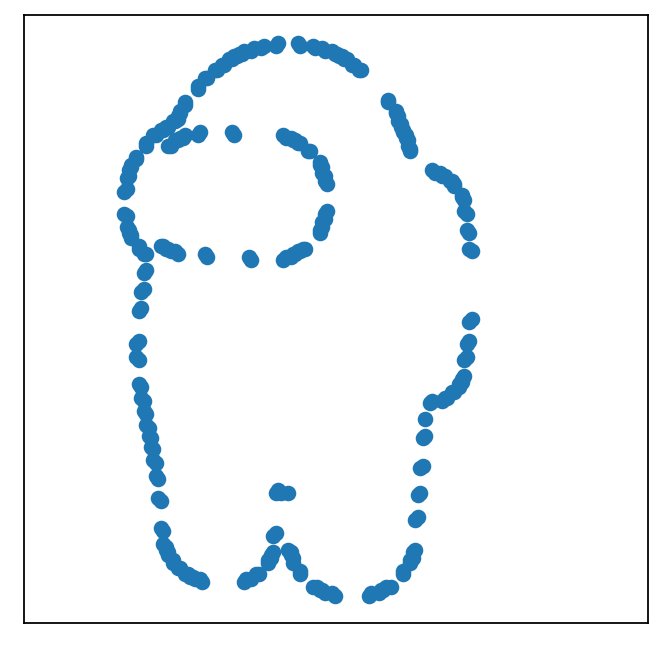

In [377]:

plt.scatter(coords[:,0], -coords[:,1])
plt.xticks([]), plt.yticks([]);
plt.xlim((0,255))

In [378]:
# get into the right shape
coords = coords.transpose()
np.shape(coords)

(2, 279)

## Part 2

In [286]:
import scanpy as sc
from Picasso import Picasso
import time


In [318]:
# Habenula neurons dataset  
# adata = sc.read_h5ad('/dfs3b/swaruplab/smorabit/collab/woodlab/cocaine_mouse_2021/analysis/test_harmony/data/neuronal_processed.h5ad')

# Habenula all celltypes dataset 
adata = sc.read('/dfs3b/swaruplab/smorabit/collab/woodlab/cocaine_mouse_2021/analysis/test_harmony/data/harmony_processed_with_counts.h5ad')


In [319]:
adata

AnnData object with n_obs × n_vars = 94600 × 32285
    obs: 'doublet_scores', 'doublets', 'Sample', 'batch', 'barcode', 'Assignment', 'Sample.No.', 'Name..Wood.lab.marking.', 'Group', 'Index', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden', 'clusternum_anno', 'celltype', 'celltype_name'
    var: 'gene_ids', 'feature_types', 'genome', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'Assignment_colors', 'Sample_colors', 'clusternum_anno_colors', 'dendrogram_clusternum_anno', 'dendrogram_leiden', 'hvg', 'leiden', 'leiden_colors', 'leiden_sizes', 'neighbors', 'paga', 'pca', 'umap'
    obsm: 'X_pca', 'X_pca_harmony', 'X_umap'
    layers: 'counts'

In [320]:
# normalize and scale HVGs
adata.X = adata.layers['counts']
sc.pp.normalize_total(adata, 10e4)
sc.pp.log1p(adata)
sc.pp.highly_variable_genes(adata, n_top_genes=3000)
sc.pp.scale(adata)

In [321]:
# optionally subset the anndata:
# adata_full = adata.copy()
# adata = adata[np.random.choice(adata.shape[0], size=5000, replace=False)]

In [322]:
# adata = adata_full

In [323]:
len(adata.obs.index)

94600

In [324]:
# subset on hvgs
scale_mat = adata.X
scale_mat = scale_mat[:, adata.var.highly_variable]
np.shape(scale_mat)

(94600, 3000)

In [422]:
# start timer
start = time.time()

# run picasso
p = Picasso(n_latent=2, epochs=500, batch_size=1000)
loSUS, latentSUS = p.fit(scale_mat, coords, frac=0.15, silent=False, ret_loss=True)

# stop timer
end = time.time()


====> Epoch: 0 Average loss: 20.1840
====> Epoch: 1 Average loss: 20.1191
====> Epoch: 2 Average loss: 18.9659
====> Epoch: 7 Average loss: 6.6988
====> Epoch: 8 Average loss: 6.6940
====> Epoch: 9 Average loss: 6.6902
====> Epoch: 10 Average loss: 6.6871
====> Epoch: 11 Average loss: 6.6855
====> Epoch: 12 Average loss: 6.6824
====> Epoch: 13 Average loss: 6.6790
====> Epoch: 14 Average loss: 6.6759
====> Epoch: 15 Average loss: 6.6753
====> Epoch: 16 Average loss: 6.6744
====> Epoch: 17 Average loss: 6.6708
====> Epoch: 18 Average loss: 6.6690
====> Epoch: 19 Average loss: 6.6667
====> Epoch: 20 Average loss: 6.6642
====> Epoch: 21 Average loss: 6.6617
====> Epoch: 22 Average loss: 6.6600
====> Epoch: 23 Average loss: 6.6584
====> Epoch: 24 Average loss: 6.6549
====> Epoch: 25 Average loss: 6.6524
====> Epoch: 26 Average loss: 6.6497
====> Epoch: 27 Average loss: 6.6479
====> Epoch: 28 Average loss: 6.6447
====> Epoch: 29 Average loss: 6.6409
====> Epoch: 30 Average loss: 6.6372
====

In [423]:
print('{} minutes'.format((end - start)/60))


66.68812610705693 minutes


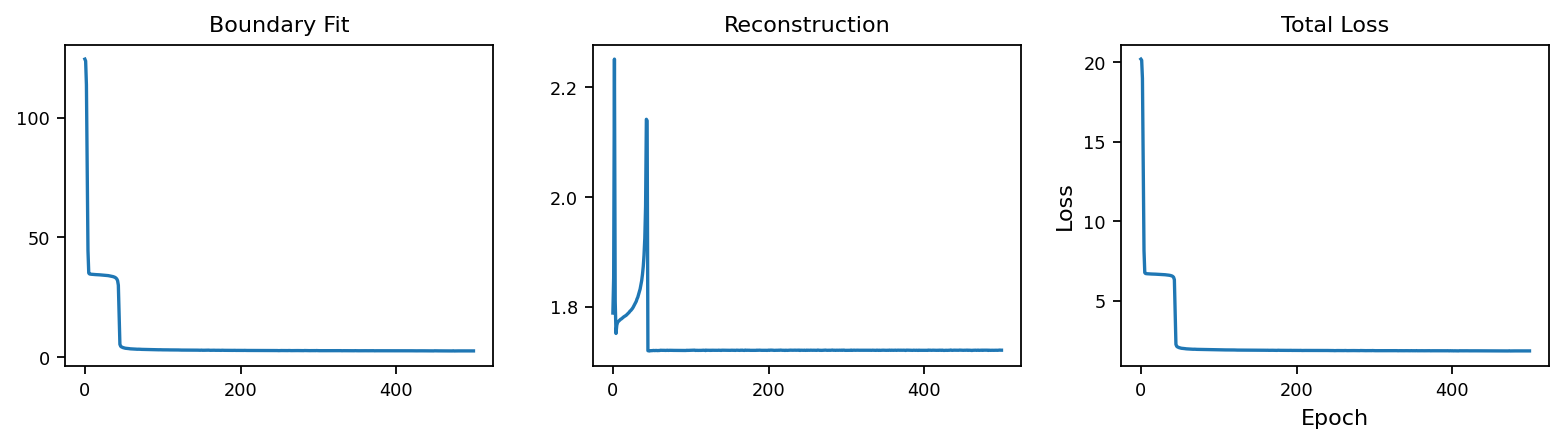

In [424]:
p.plotLosses(figsize=(10,3),axisFontSize=10,tickFontSize=8)


In [430]:
# add result to anndata
adata.obsm['X_sus'] = latentSUS
adata.obs['SUS1'] = latentSUS[:,0]
adata.obs['SUS2'] = -latentSUS[:,1]
adata.obs.to_csv('data/cell_meta_sus6.csv')
np.shape(latentSUS)

(94600, 2)

In [426]:
adata.obs.columns

Index(['doublet_scores', 'doublets', 'Sample', 'batch', 'barcode',
       'Assignment', 'Sample.No.', 'Name..Wood.lab.marking.', 'Group', 'Index',
       'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt',
       'leiden', 'clusternum_anno', 'celltype', 'celltype_name', 'SUS1',
       'SUS2'],
      dtype='object')

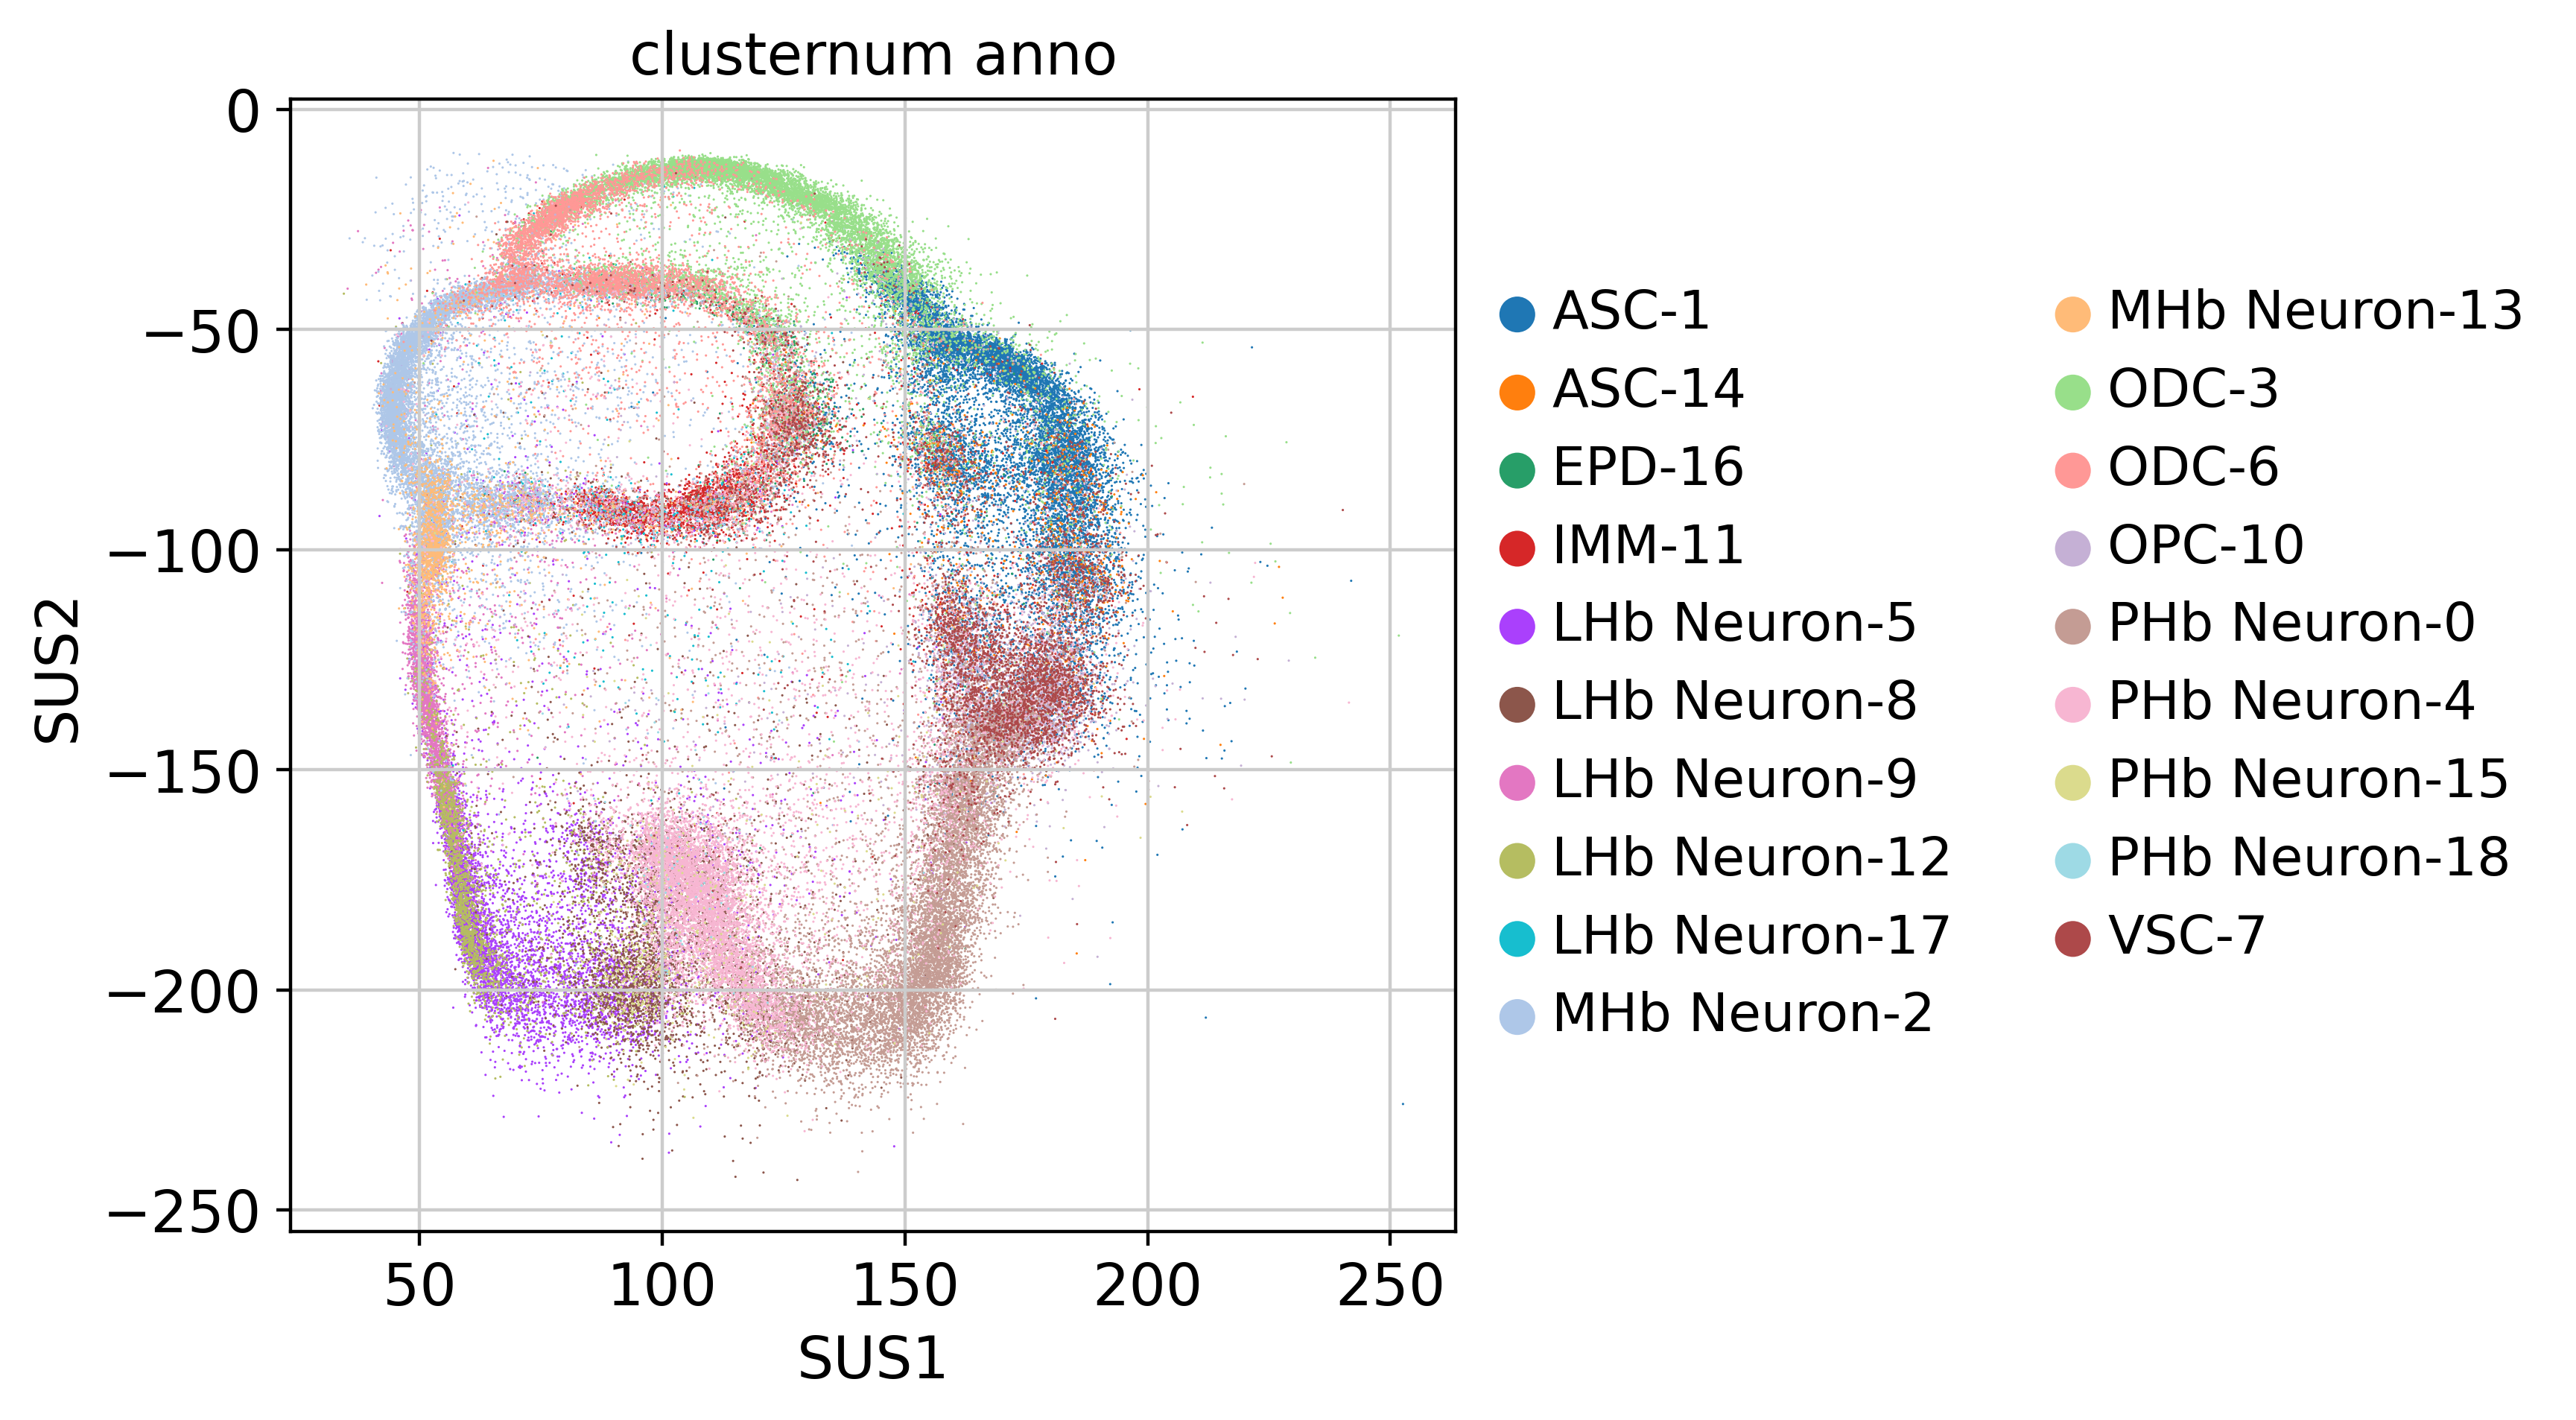

In [427]:
sc.set_figure_params(dpi=200, figsize=(5,5))
sc.pl.scatter(adata, x='SUS1', y='SUS2', color='clusternum_anno', frameon=False, save='_amogus6.pdf')


In [ ]:
sc.pl.scatter(adata, x='SUS1', y='SUS2', color='Nr4a2', frameon=False)

## Second attempt: using harmonized PCs instead of the scaled expression matrix

In [246]:
# start timer
start = time.time()

# run picasso
p = Picasso(n_latent=2, epochs=250, batch_size=1000)
loSUS, latentSUS = p.fit(adata.obsm['X_pca_harmony'], coords, frac=0.15, silent=False, ret_loss=True)

# stop timer
end = time.time()


====> Epoch: 0 Average loss: 7.8752
====> Epoch: 1 Average loss: 7.4761
====> Epoch: 2 Average loss: 6.9789
====> Epoch: 3 Average loss: 6.2068
====> Epoch: 4 Average loss: 5.0321
====> Epoch: 5 Average loss: 3.7327
====> Epoch: 6 Average loss: 2.8008
====> Epoch: 7 Average loss: 2.1569
====> Epoch: 8 Average loss: 1.6670
====> Epoch: 9 Average loss: 1.4010
====> Epoch: 10 Average loss: 1.2743
====> Epoch: 11 Average loss: 1.2069
====> Epoch: 12 Average loss: 1.1606
====> Epoch: 13 Average loss: 1.1307
====> Epoch: 14 Average loss: 1.1100
====> Epoch: 15 Average loss: 1.0930
====> Epoch: 16 Average loss: 1.0809
====> Epoch: 17 Average loss: 1.0731
====> Epoch: 18 Average loss: 1.0656
====> Epoch: 19 Average loss: 1.0584
====> Epoch: 20 Average loss: 1.0550
====> Epoch: 21 Average loss: 1.0517
====> Epoch: 22 Average loss: 1.0445
====> Epoch: 23 Average loss: 1.0420
====> Epoch: 24 Average loss: 1.0385
====> Epoch: 25 Average loss: 1.0354
====> Epoch: 26 Average loss: 1.0287
====> Epoch

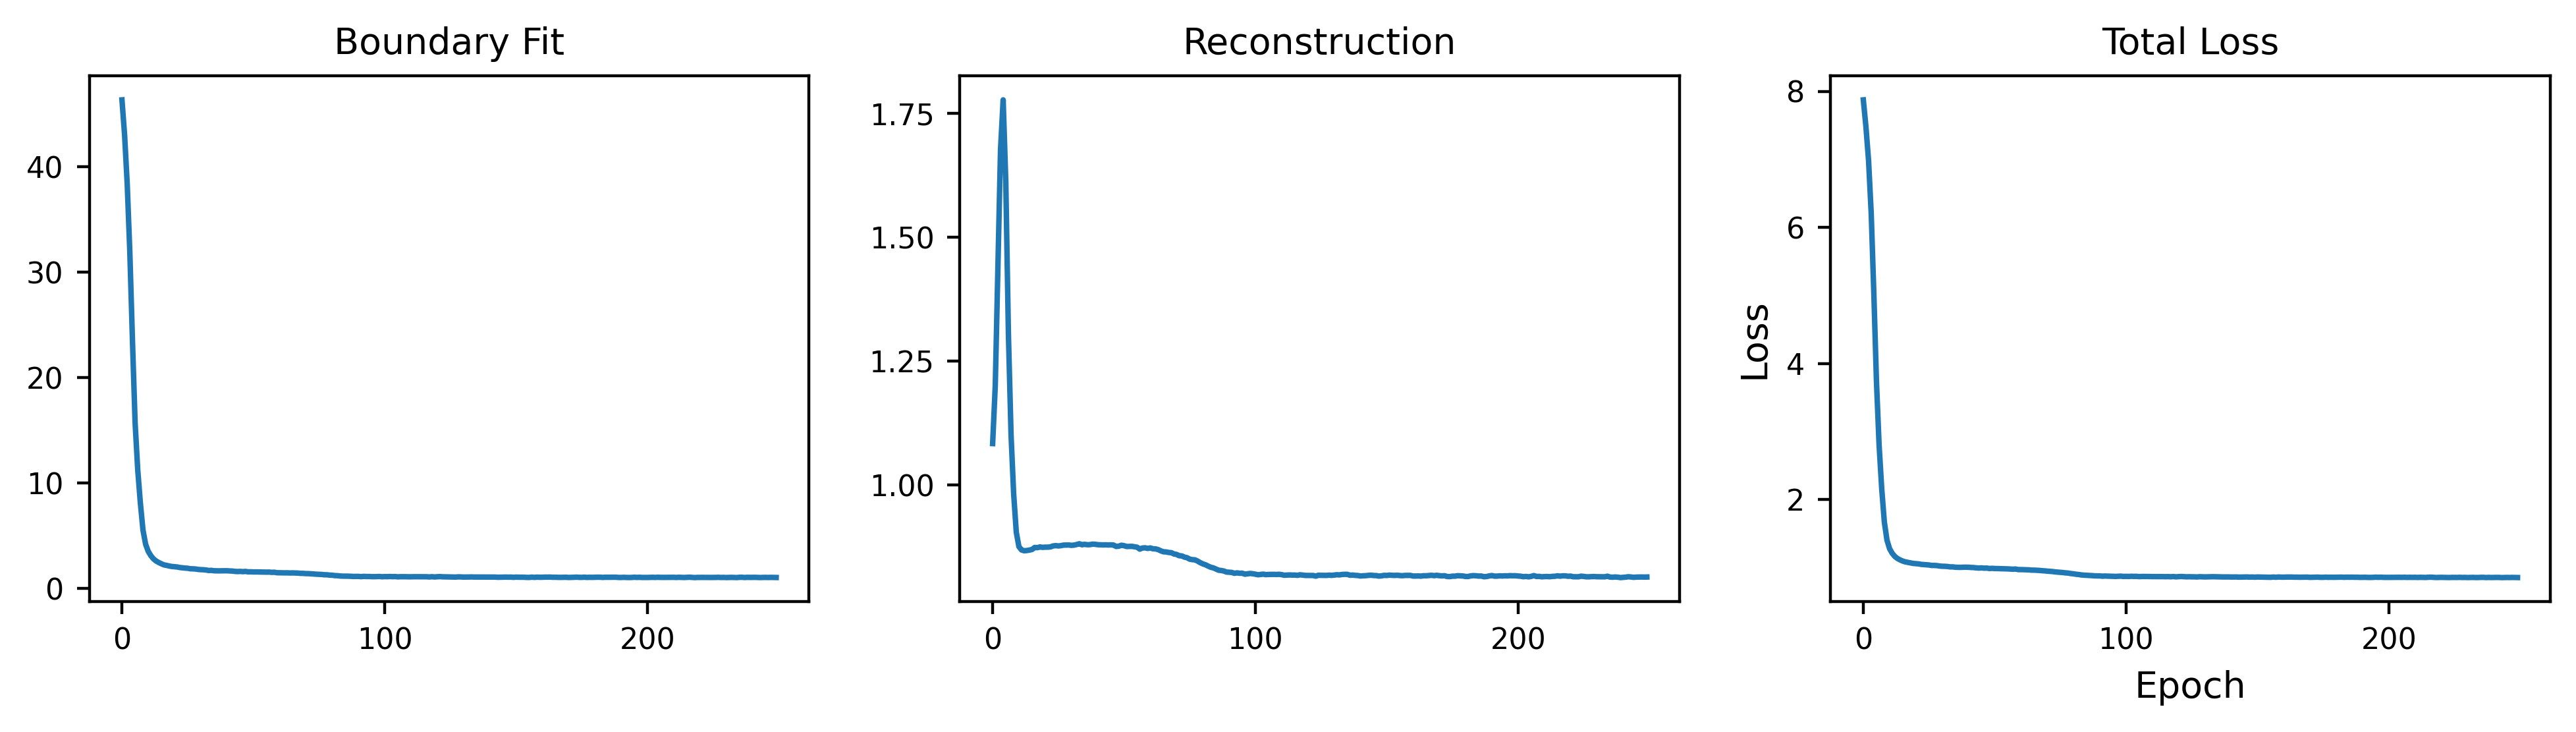

In [247]:
p.plotLosses(figsize=(10,3),axisFontSize=10,tickFontSize=8)


In [248]:
# add result to anndata
adata.obsm['X_sus'] = latentSUS
adata.obs['SUS1'] = latentSUS[:,0]
adata.obs['SUS2'] = -latentSUS[:,1]


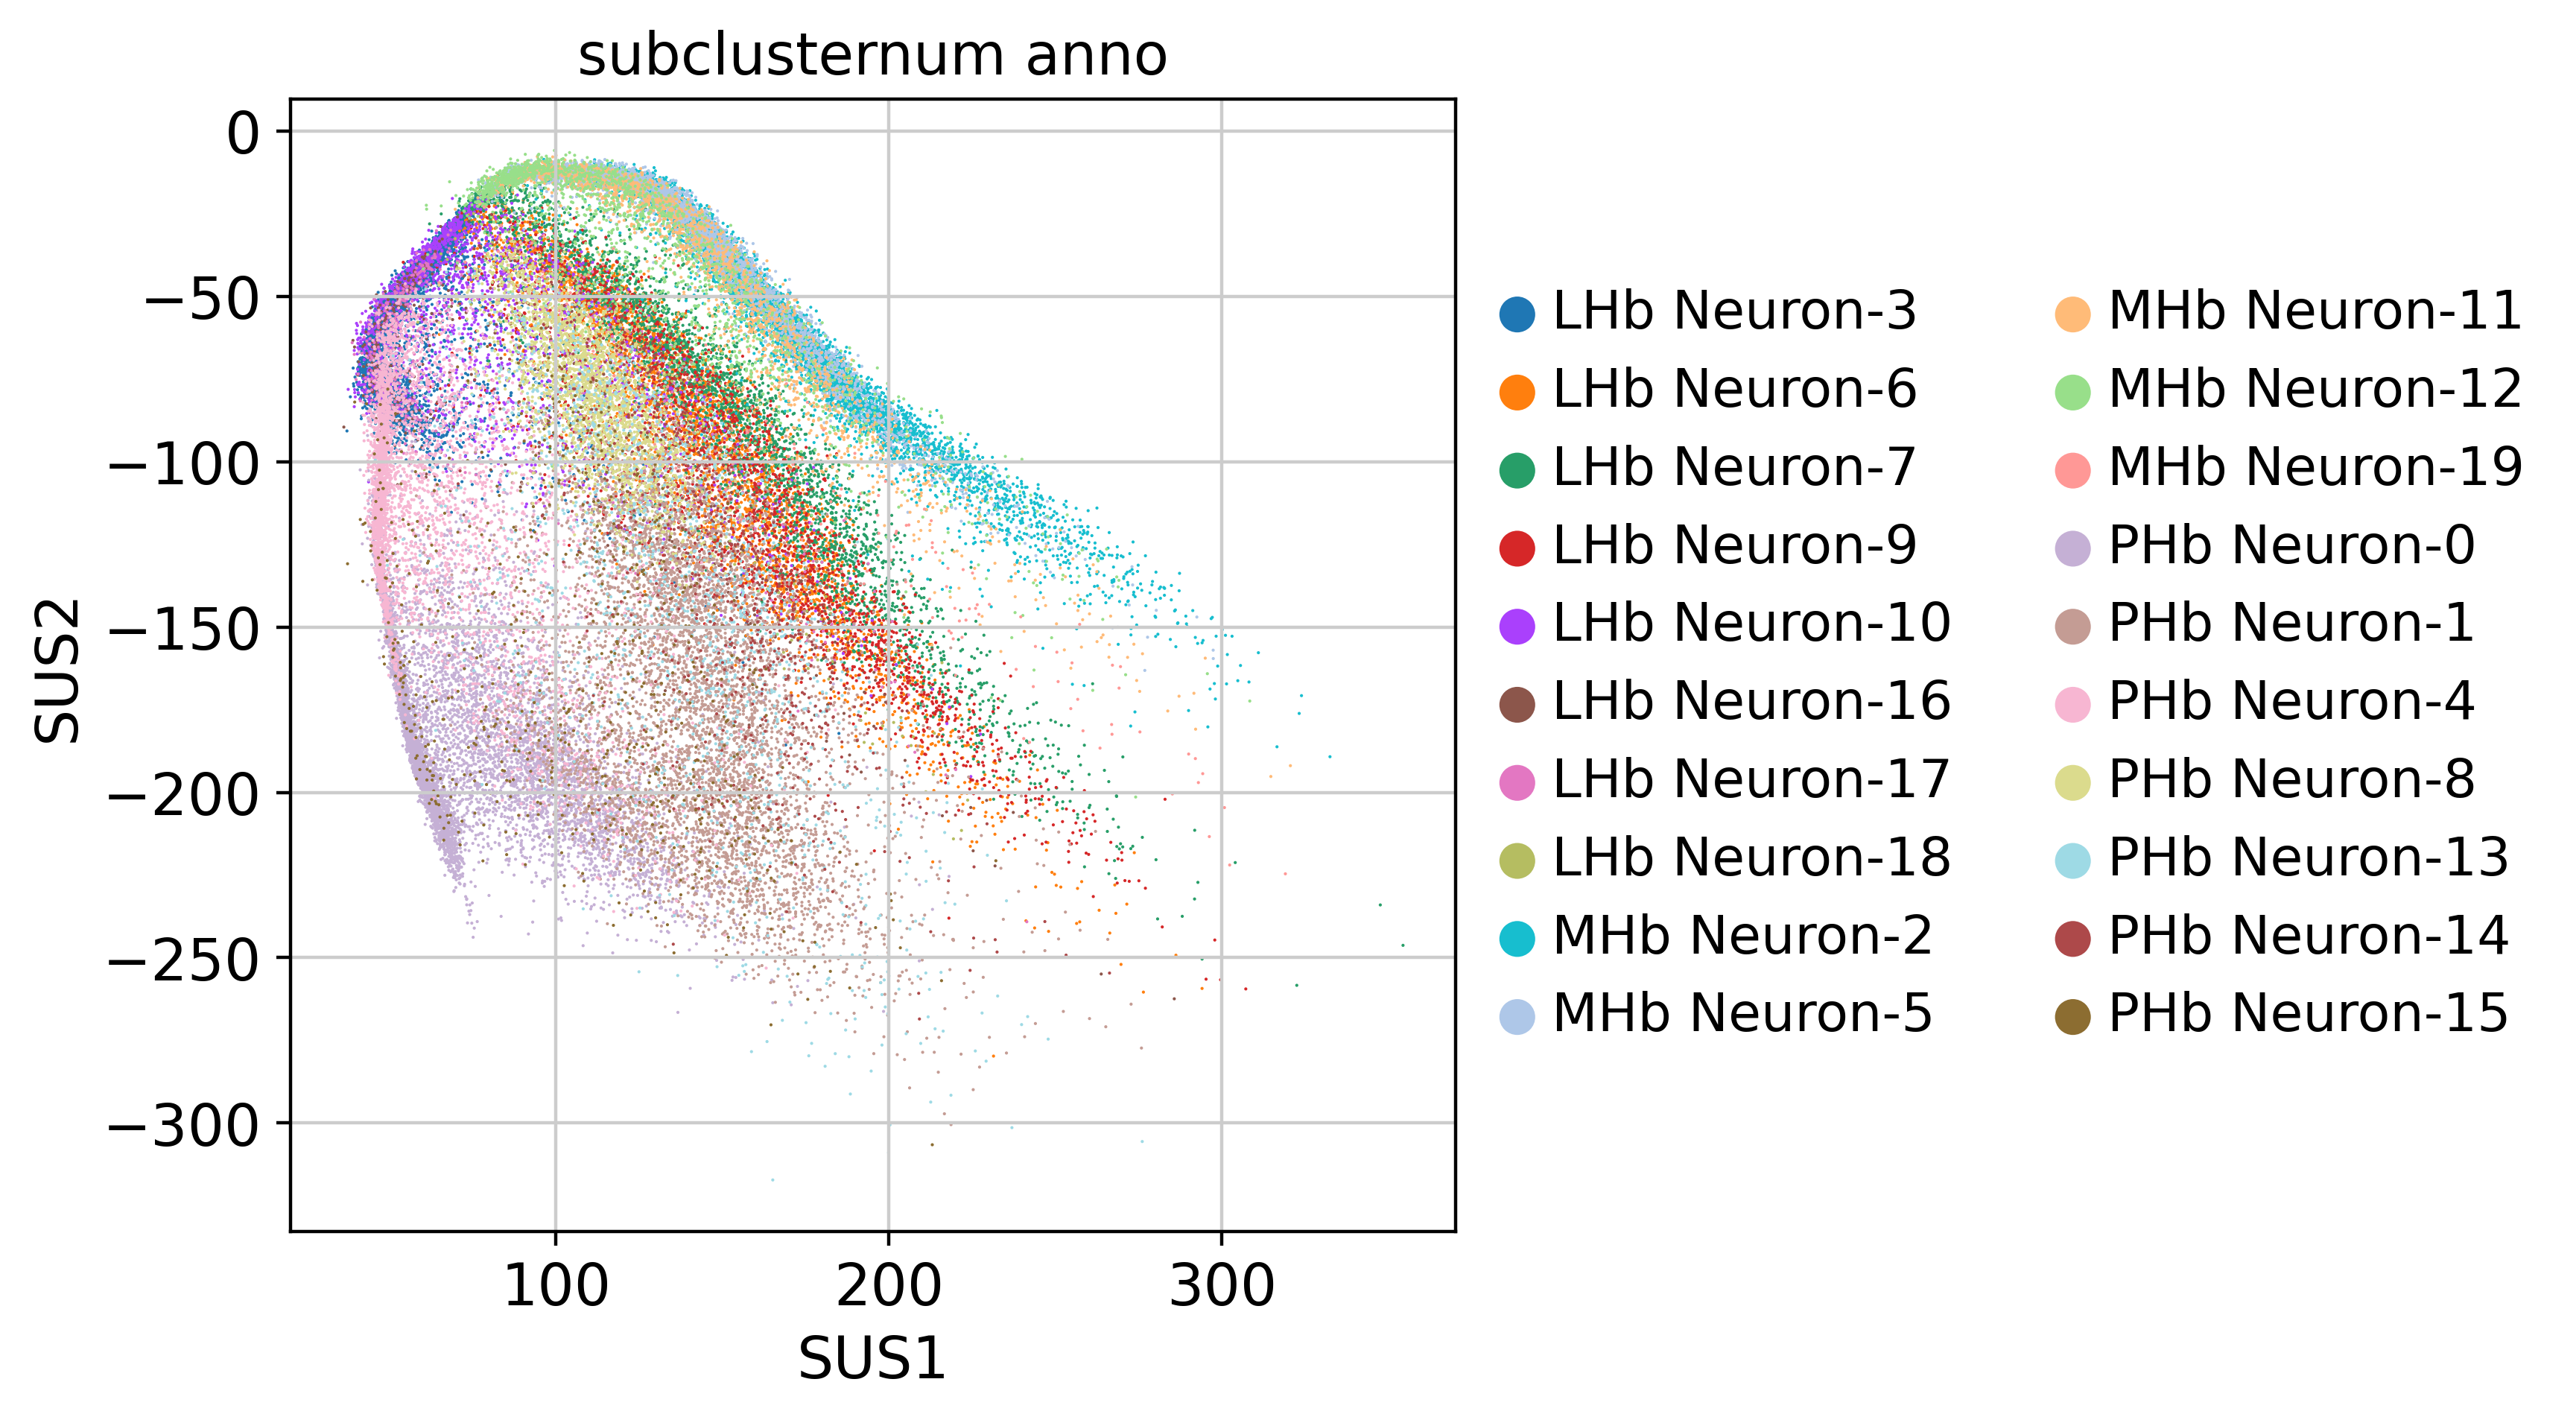

In [249]:
sc.set_figure_params(dpi=200, figsize=(5,5))
sc.pl.scatter(adata, x='SUS1', y='SUS2', color='subclusternum_anno', frameon=False, save='_amogus2.pdf')

## Try running picasso on my data using the Elephant shape

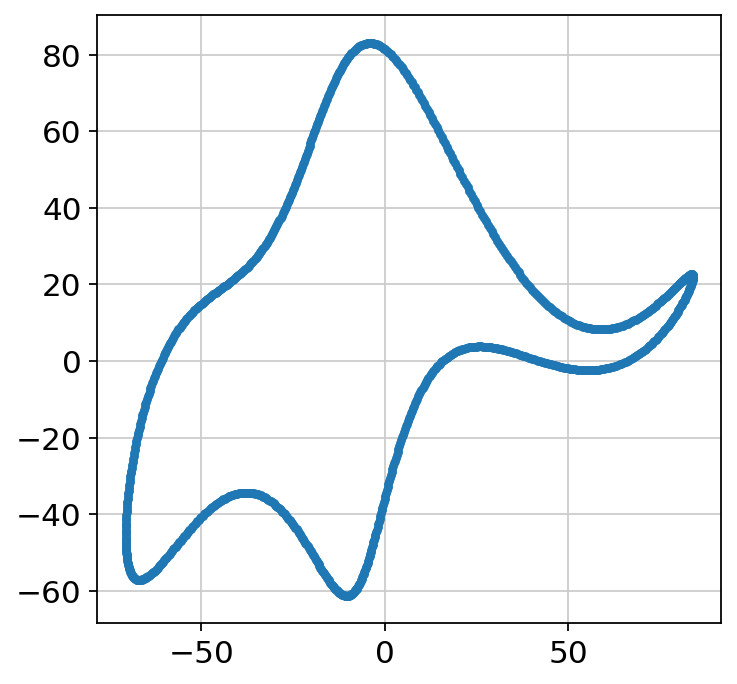

In [395]:
# elephant parameters
batch_size = 1000 #any number < n_obs in data matrix

p1, p2, p3, p4 = (50 - 30j, 18 +  8j, 12 - 10j, -14 - 60j )
p5 = 40 + 20j # eyepiece

def fourier(t, C):
    f = np.zeros(t.shape)
    A, B = C.real, C.imag
    for k in range(len(C)):
        f = f + A[k]*np.cos(k*t) + B[k]*np.sin(k*t)
    return f

def elephant(t, p1, p2, p3, p4, p5):
    npar = 6
    Cx = np.zeros((npar,), dtype='complex')
    Cy = np.zeros((npar,), dtype='complex')

    Cx[1] = p1.real*1j
    Cx[2] = p2.real*1j
    Cx[3] = p3.real
    Cx[5] = p4.real

    Cy[1] = p4.imag + p1.imag*1j
    Cy[2] = p2.imag*1j
    Cy[3] = p3.imag*1j

    # x = np.append(fourier(t,Cx), [-p5.imag]) #[-p5.imag]
    # y = np.append(fourier(t,Cy), [p5.imag]) #[p5.imag]
    x = fourier(t,Cx)
    y = fourier(t,Cy)

    return x,y

x, y = elephant(np.linspace(0,2*np.pi,batch_size), p1, p2, p3, p4, p5)

#Make array input for dimension of shape 


coords = np.array([list(y),list(-x)])

plt.plot(y,-x,'.')
plt.show()

In [399]:
coords.shape

(2, 1000)

In [ ]:
#Run Picasso
p = Picasso(n_latent = 2, epochs = 500, batch_size = batch_size)

#Get losses and latent space representation
lossesEl, latentEl = p.fit(scaled_mat,coords, frac = 0.15,silent=True,ret_loss=True) #frac

In [ ]:
# add result to anndata
adata.obsm['X_EL'] = latentEl
adata.obs['El1'] = latentEl[:,0]
adata.obs['El2'] = -latentEl[:,1]


In [ ]:
sc.set_figure_params(dpi=200, figsize=(5,5))
sc.pl.scatter(adata, x='El1', y='El2', color='clusternum_anno', frameon=False, save='_Elephant1.pdf')

In [429]:
import os
os.getcwd()

'/dfs3b/swaruplab/smorabit/analysis/ADDS_2021/Picasso2/picasso'